Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/bigdata/courses.csv')

EDA

In [4]:
df

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [5]:
# Melihat informasi dasar tentang dataset
print("Informasi Dataset:")
print(df.info())

# Menampilkan 5 baris pertama dari dataset
print("\n5 Baris Pertama Dataset:")
print(df.head())

# Menampilkan 5 baris terakhir dari dataset
print("\n5 Baris terakhir Dataset:")
print(df.tail())

# Statistik deskriptif untuk kolom numerik
print("\nStatistik Deskriptif:")
print(df.describe())

# Melihat jumlah missing values pada setiap kolom
print("\nJumlah Missing Values pada Setiap Kolom:")
print(df.isnull().sum())

# shape dataset
print("\nShape Dataset:")
print(df.shape)

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes
None

5 Baris Pertama Dataset:
  code_module code_presentation  module_presentation_length
0         AAA             2013J                         268
1         AAA             2014J                         269
2         BBB             2013J                         268
3         BBB             2014J                         262
4         BBB             2013B                         240

5 Baris terakhir Dataset:
   code_module code_presentation  module_presentation_length
17         FFF             2013B                         240
18  

Preprocessing

In [6]:
# Menampilkan jumlah missing values pada setiap kolom
missing_data = df.isnull().sum()

# Menampilkan kolom-kolom dengan missing values (jika ada)
columns_with_missing_data = missing_data[missing_data > 0]
print("Kolom dengan Missing Values:")
print(columns_with_missing_data)

# Menampilkan jumlah total missing values dalam dataset
total_missing_values = missing_data.sum()
print("\nTotal Missing Values dalam Dataset:", total_missing_values)

Kolom dengan Missing Values:
Series([], dtype: int64)

Total Missing Values dalam Dataset: 0


In [8]:
grouped_stats = df.groupby('code_module')['module_presentation_length'].describe()
print("Statistik Deskriptif Berdasarkan Kelompok Code Module:\n", grouped_stats)

Statistik Deskriptif Berdasarkan Kelompok Code Module:
              count        mean        std    min     25%    50%     75%    max
code_module                                                                   
AAA            2.0  268.500000   0.707107  268.0  268.25  268.5  268.75  269.0
BBB            4.0  251.000000  16.532796  234.0  238.50  251.0  263.50  268.0
CCC            2.0  255.000000  19.798990  241.0  248.00  255.0  262.00  269.0
DDD            4.0  251.000000  12.138094  240.0  240.75  251.0  261.25  262.0
EEE            3.0  259.333333  15.885003  241.0  254.50  268.0  268.50  269.0
FFF            4.0  254.500000  16.176114  240.0  240.75  254.5  268.25  269.0
GGG            3.0  257.000000  14.422205  241.0  251.00  261.0  265.00  269.0


In [9]:
data_count = df.groupby(['code_module', 'code_presentation']).size().reset_index(name='count')
print("Jumlah Data per Code Module dan Code Presentation:\n", data_count)

Jumlah Data per Code Module dan Code Presentation:
    code_module code_presentation  count
0          AAA             2013J      1
1          AAA             2014J      1
2          BBB             2013B      1
3          BBB             2013J      1
4          BBB             2014B      1
5          BBB             2014J      1
6          CCC             2014B      1
7          CCC             2014J      1
8          DDD             2013B      1
9          DDD             2013J      1
10         DDD             2014B      1
11         DDD             2014J      1
12         EEE             2013J      1
13         EEE             2014B      1
14         EEE             2014J      1
15         FFF             2013B      1
16         FFF             2013J      1
17         FFF             2014B      1
18         FFF             2014J      1
19         GGG             2013J      1
20         GGG             2014B      1
21         GGG             2014J      1


In [10]:
print("Jumlah unik code_module:", df['code_module'].nunique())
print("Jumlah unik code_presentation:", df['code_presentation'].nunique())

Jumlah unik code_module: 7
Jumlah unik code_presentation: 4


Visualitation

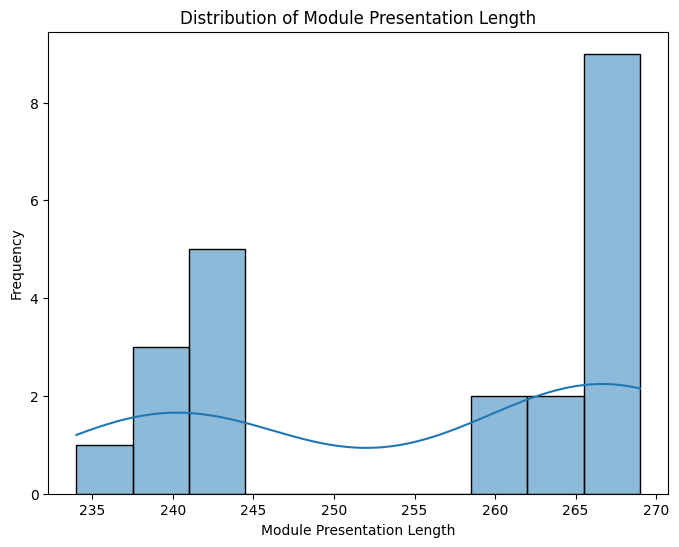

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['module_presentation_length'], bins=10, kde=True)
plt.xlabel('Module Presentation Length')
plt.ylabel('Frequency')
plt.title('Distribution of Module Presentation Length')
plt.show()

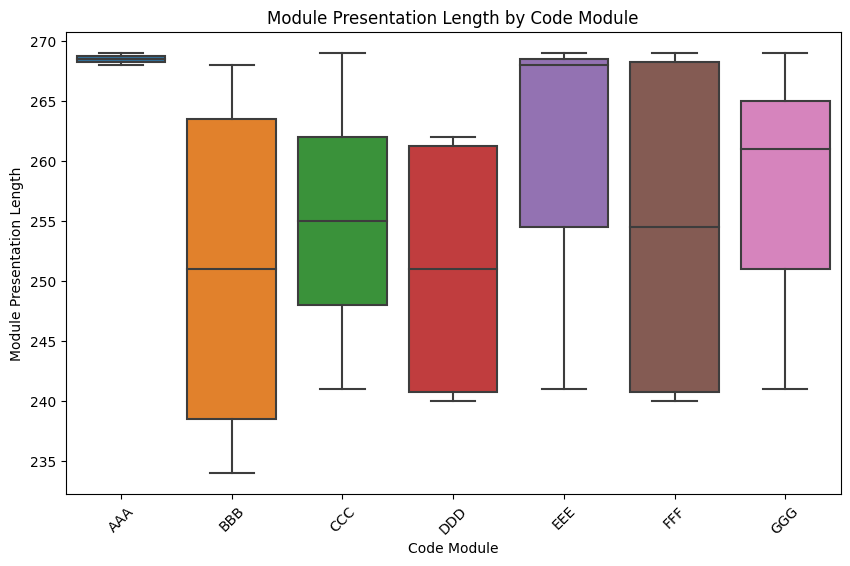

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='code_module', y='module_presentation_length', data=df)
plt.xlabel('Code Module')
plt.ylabel('Module Presentation Length')
plt.title('Module Presentation Length by Code Module')
plt.xticks(rotation=45)
plt.show()

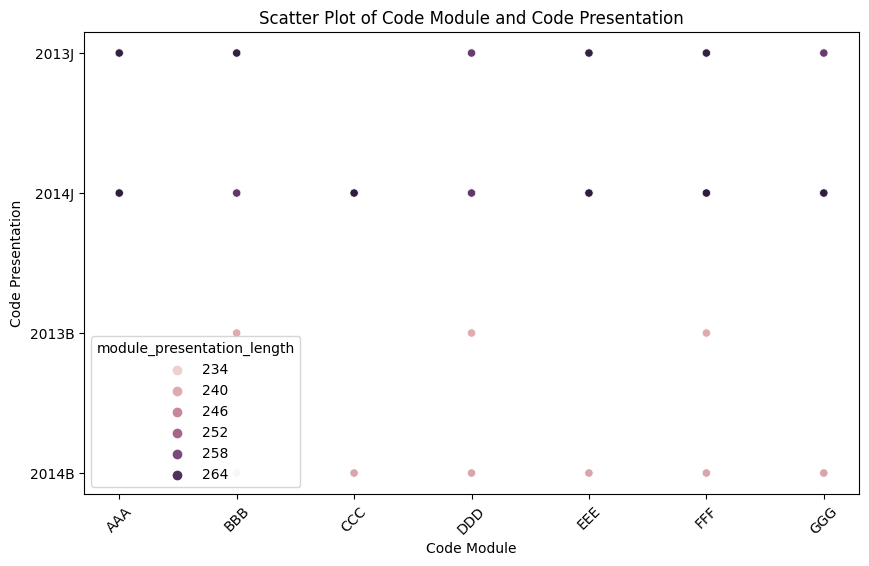

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='code_module', y='code_presentation', data=df, hue='module_presentation_length')
plt.xlabel('Code Module')
plt.ylabel('Code Presentation')
plt.title('Scatter Plot of Code Module and Code Presentation')
plt.xticks(rotation=45)
plt.show()

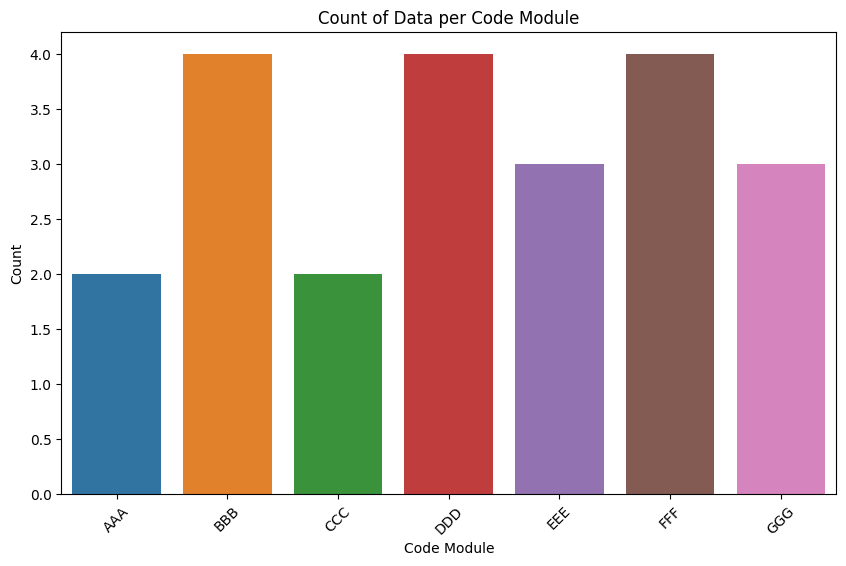

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='code_module', data=df)
plt.xlabel('Code Module')
plt.ylabel('Count')
plt.title('Count of Data per Code Module')
plt.xticks(rotation=45)
plt.show()

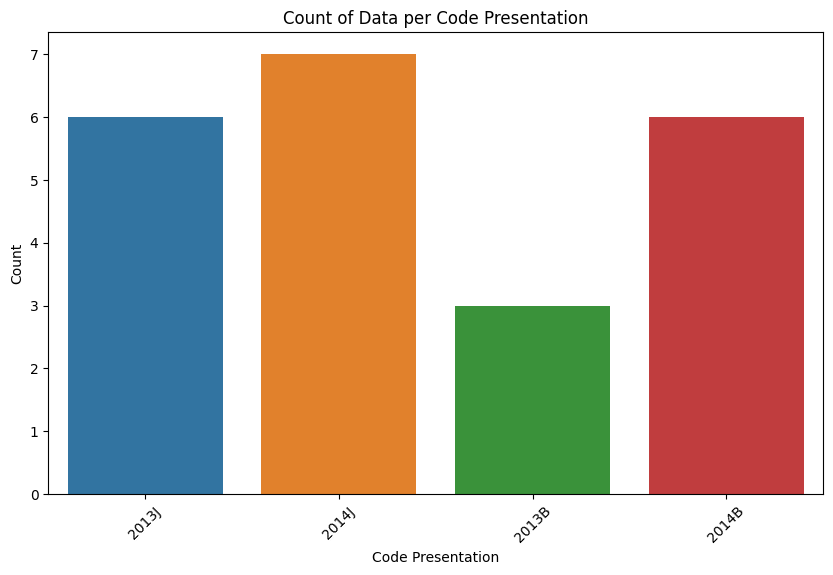

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='code_presentation', data=df)
plt.xlabel('Code Presentation')
plt.ylabel('Count')
plt.title('Count of Data per Code Presentation')
plt.xticks(rotation=45)
plt.show()